# **LEAD SCORING ASSIGNMENT WORK**
#### **GOAL:** To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads, which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e., most likely to convert, whereas a lower score would mean that the lead is cold and will mostly not get converted.

>#### **CONTENTS:**
>1. SUMMARY
>2. LOAD THE DATASET
>3. DATA CLEANING AND DATA MANIPULATION
>4. EXPLORATORY DATA ANALYSIS (EDA)
>5. FEATURE SELECTION
>6. TRAIN-TEST SPLIT
>7. PREPROCESSING PIPELINES
>8. MODEL BUILDING
>9. RESULTS
>10. RECOMMENDATIONS
>11. SOLUTIONS TO ADDITIONAL QUESTIONS AS ASKED IN THE PDF.

#### **1. SUMMARY**

**Project Summary: Lead Scoring Using Logistic Regression**

>The objective of this project was to build a logistic regression model that assigns a lead score (0–100) to each potential customer, indicating their likelihood of conversion. A higher score implies a more promising lead, enabling the business to prioritize follow-ups effectively.

>We began with extensive data cleaning and feature engineering. At first, we checked for duplicated entries, also, null values in columns that were filled with 'Select' instead of standardized np.nan. So, we made the null values uniform. After cleaning we can see that there are multiple rows with null values as follows: <5%, 15-35%, 50+% and even in 75% range. Upon careful consideration we came to the conclusion that if we simply impute the values with central tendencies directly (like median and mode) then it will create bias, also, if we directly drop the columns like 'lead_profile' it will delete valuable decisive information. Finally, we made judgement that the best course of action is to use Scikit-Learn's SimpleImputer method along with missing-indicator columns. This will make sure that the algorithm understands which values are artificially added. 

>Data cleaning was followed by exploratory data analysis (EDA) to identify patterns in both the numerical and categorical variables where we performed both univariate analysis and multivariate analysis to check if the data is balanced. 

>A robust preprocessing pipeline was constructed using scikit-learn’s ColumnTransformer and Pipeline, ensuring scalable and reproducible results. This was done because the parameters/columns are of both numerical types and categorical types. For both we would need to create dummy variables/missing-indicator variables. For this the Pipeline and ColumnTransformer, at first, seperately creates the necessary additional variables using one-hot-encoding for both numerical columns as well as categorical columns and finally the ColumnTransformer combines the dataframe into one unit. To be noted, as the dummy-variable/ one-hot encoding of numerical variable isn't same as categorical variable because the algorithm can't directly understand the meaning of categorical columns, it was encoded seperately and then combined using ColumnTransformer.

>Now atlast, using Scikit-Learn's model building and using LogisticRegression, we create the model using the training data that was split 80-20 and finally tested on the text dataset. Also, using other methods of Scikit-Learn, we got ROC-AUC curve, classification score, accuracy score and confusion matrix.

>The final model achieved a score of 95% accuracy, with balanced precision and recall across both converted and non-converted classes. Lead scores were derived from the model's predicted probabilities, and visual validation confirmed that most converted leads had high scores, while non-converted leads had lower scores.

>Additionally, the modular design of the pipeline makes it easy to update or scale with new data or shifting business requirements.


#### Import the relevant libraries

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# show total rows and columns in the dataset
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [104]:
# random state
ran = 17

#### **2. LOAD THE DATASET**

In [105]:
# load the primary dataset
leads_df = pd.read_csv('Leads.csv')


In [106]:
# look at the first 5 rows of the dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [107]:
# the column names are not in convenient format, so we will rename them
leads_df.columns = leads_df.columns.str.replace(' ', '_').str.lower()

# check the available columns again
leads_df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

SPLITTING THE TARGET VARIABLE AND THE PARAMETERS:

In [108]:
# splitting the target variable to y and the parameters to X
X = leads_df.drop("converted", axis=1)
y = leads_df["converted"]

In [109]:
X.info()

# CONCLUSION:
# the dataset contains 9240 rows and 37 columns.
# there are some null values too.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   prospect_id                                    9240 non-null   object 
 1   lead_number                                    9240 non-null   int64  
 2   lead_origin                                    9240 non-null   object 
 3   lead_source                                    9204 non-null   object 
 4   do_not_email                                   9240 non-null   object 
 5   do_not_call                                    9240 non-null   object 
 6   totalvisits                                    9103 non-null   float64
 7   total_time_spent_on_website                    9240 non-null   int64  
 8   page_views_per_visit                           9103 non-null   float64
 9   last_activity                                  9137 

---

#### **3. DATA CLEANING AND DATA MANIPULATIONS**

NOW FIRST CONVERTING THE MISSING VALUES TO PROPER UNIFORM FORMAT OF np.nan AS WE OBSERVED SOME OF THE MISSING VALUES ARE ENTERED AS 'Select'.

In [110]:
# look at the columns again
X.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [111]:
# check for duplicated entries
X[X.duplicated()]

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity


There is no duplicated column.

In [112]:
# check the info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   prospect_id                                    9240 non-null   object 
 1   lead_number                                    9240 non-null   int64  
 2   lead_origin                                    9240 non-null   object 
 3   lead_source                                    9204 non-null   object 
 4   do_not_email                                   9240 non-null   object 
 5   do_not_call                                    9240 non-null   object 
 6   totalvisits                                    9103 non-null   float64
 7   total_time_spent_on_website                    9240 non-null   int64  
 8   page_views_per_visit                           9103 non-null   float64
 9   last_activity                                  9137 

In [113]:
X['specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [114]:
X['how_did_you_hear_about_x_education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

NOTE:
>By manual observation of each columns it can be seen that some values have 'Select' instead of missing value. So we will replace 'Select' with np.nan

In [115]:
# replacing the 'Select' value with null value for uniformity.
X.replace("Select", np.nan, inplace=True)

# look at the null percentage again
X.isnull().mean() * 100

prospect_id                                       0.000000
lead_number                                       0.000000
lead_origin                                       0.000000
lead_source                                       0.389610
do_not_email                                      0.000000
do_not_call                                       0.000000
totalvisits                                       1.482684
total_time_spent_on_website                       0.000000
page_views_per_visit                              1.482684
last_activity                                     1.114719
country                                          26.634199
specialization                                   36.580087
how_did_you_hear_about_x_education               78.463203
what_is_your_current_occupation                  29.112554
what_matters_most_to_you_in_choosing_a_course    29.318182
search                                            0.000000
magazine                                          0.0000

CONCLUSION:
>Now, the null values of the dataset are ready to be imputed with SimpleImputer of Scikit-Learn.

---

#### **4. EXPLORATORY DATA ANALYSIS (EDA)**

4.1 UNIVARIATE ANALYSIS

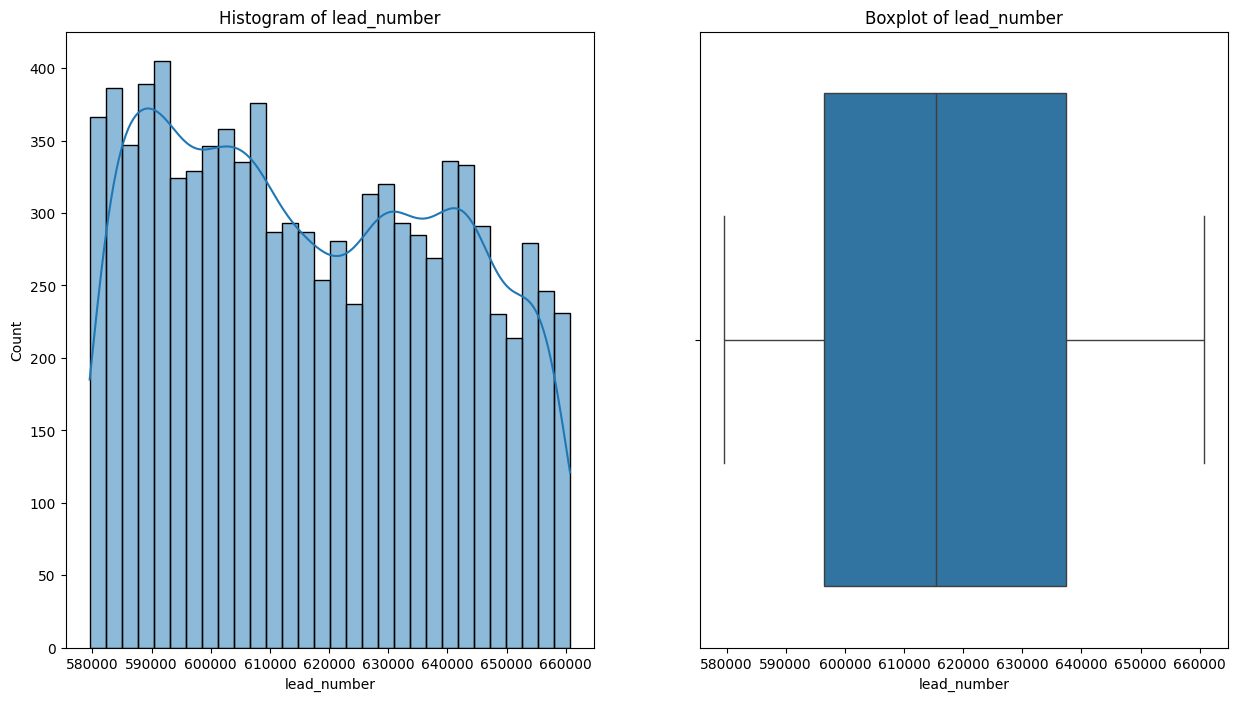

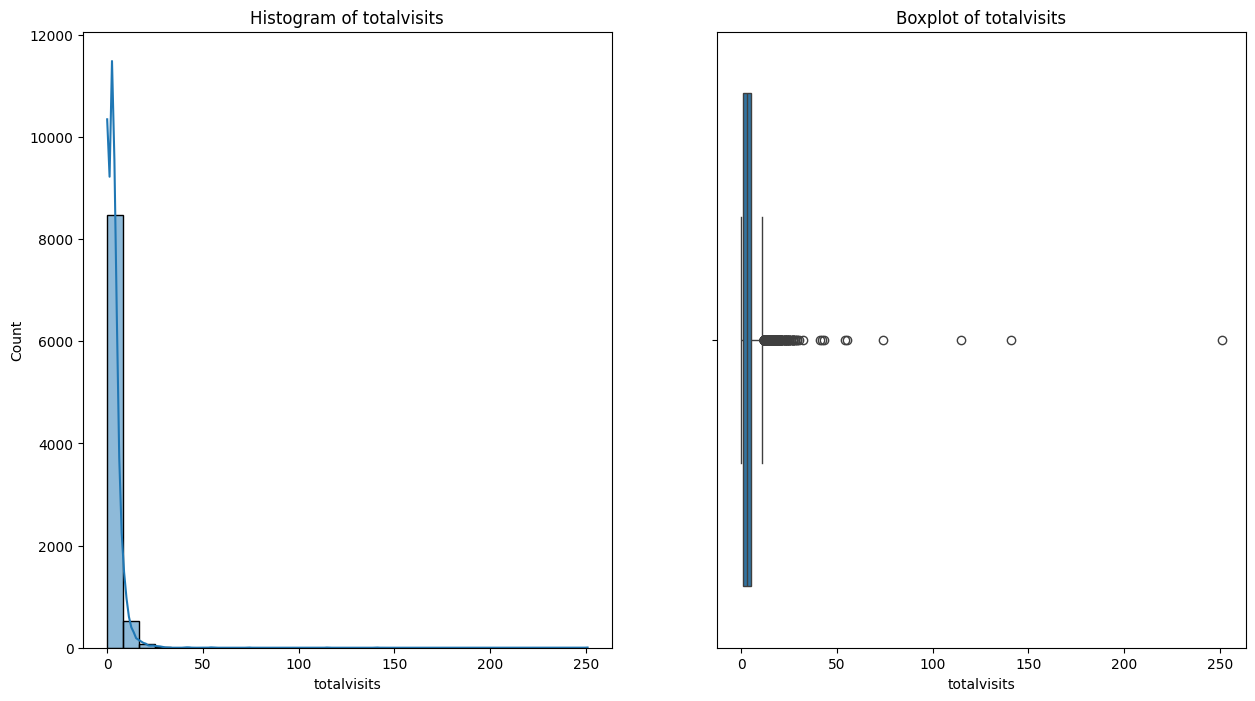

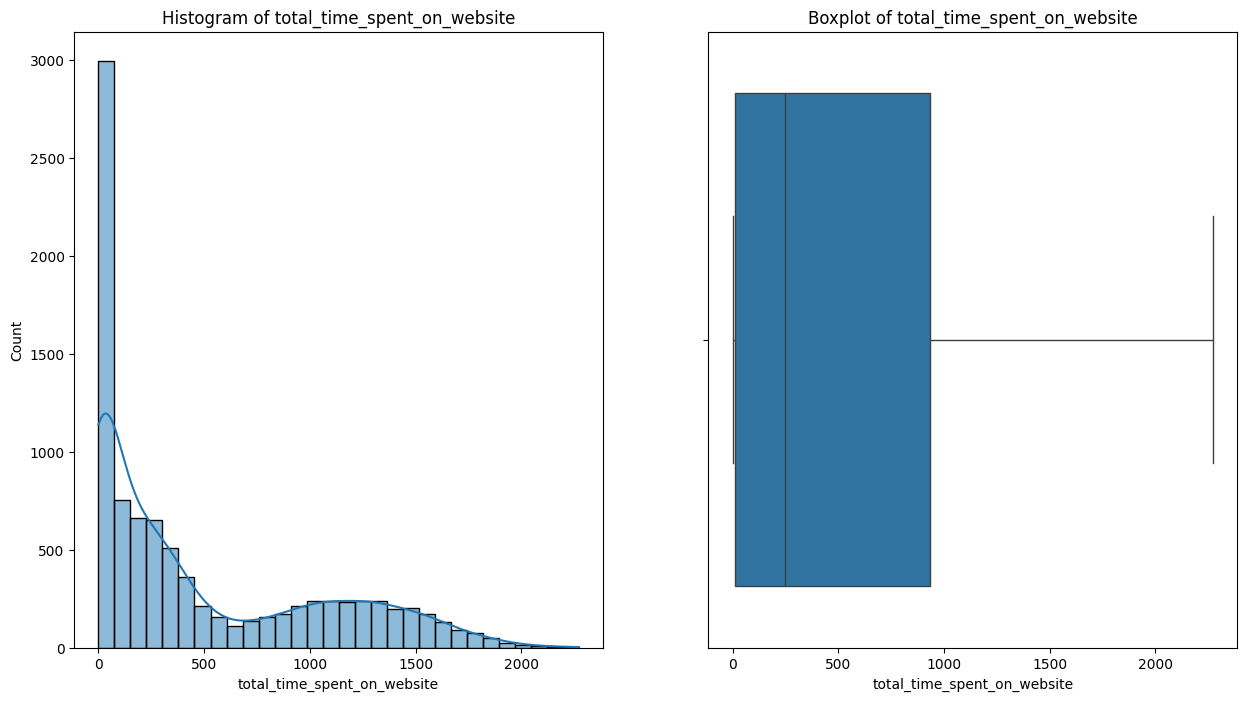

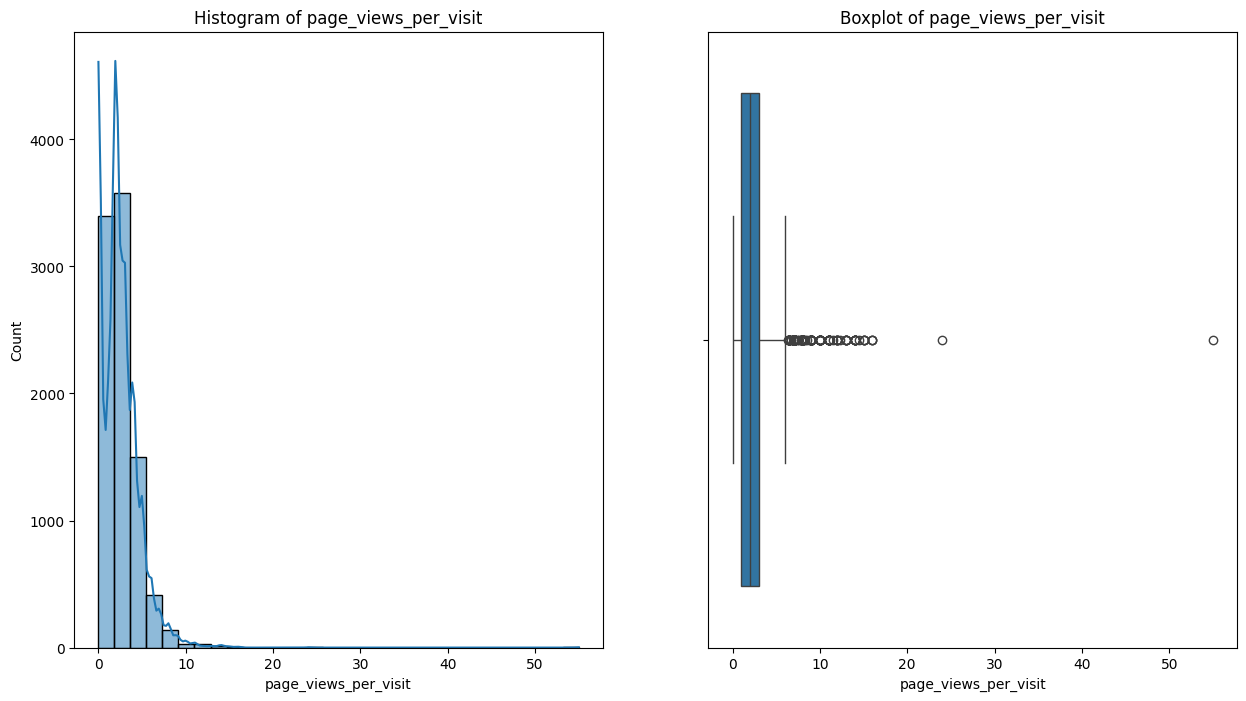

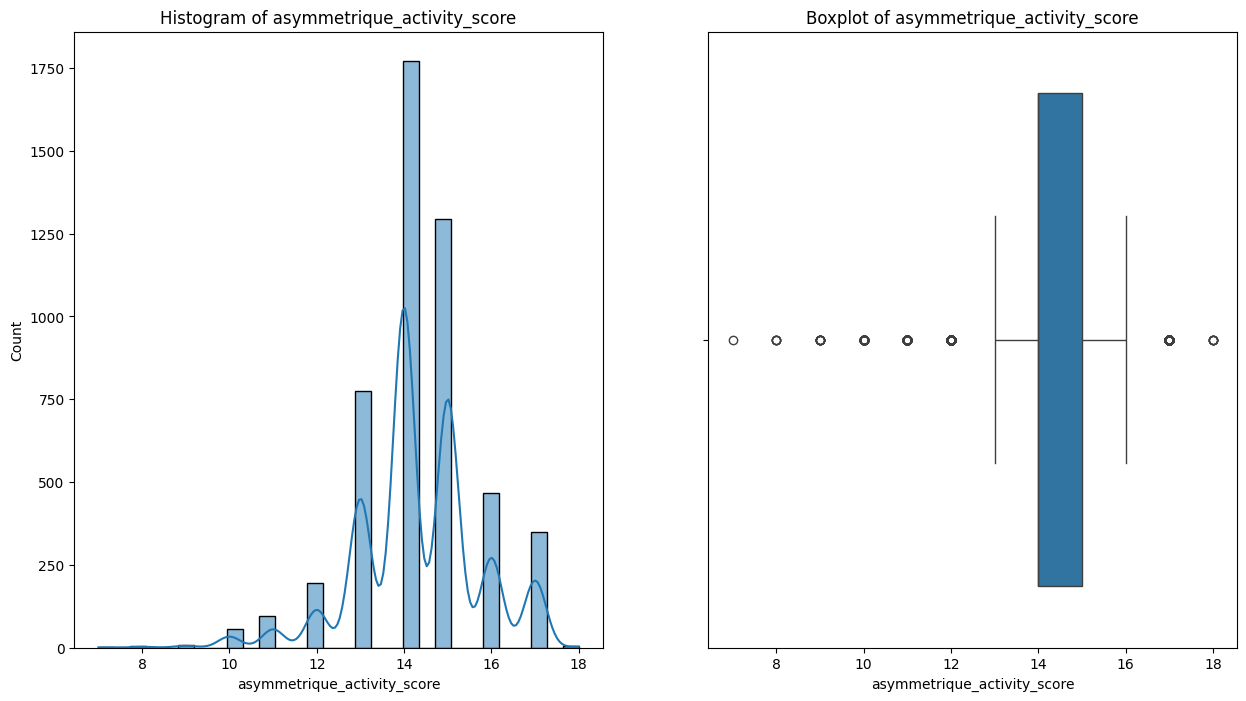

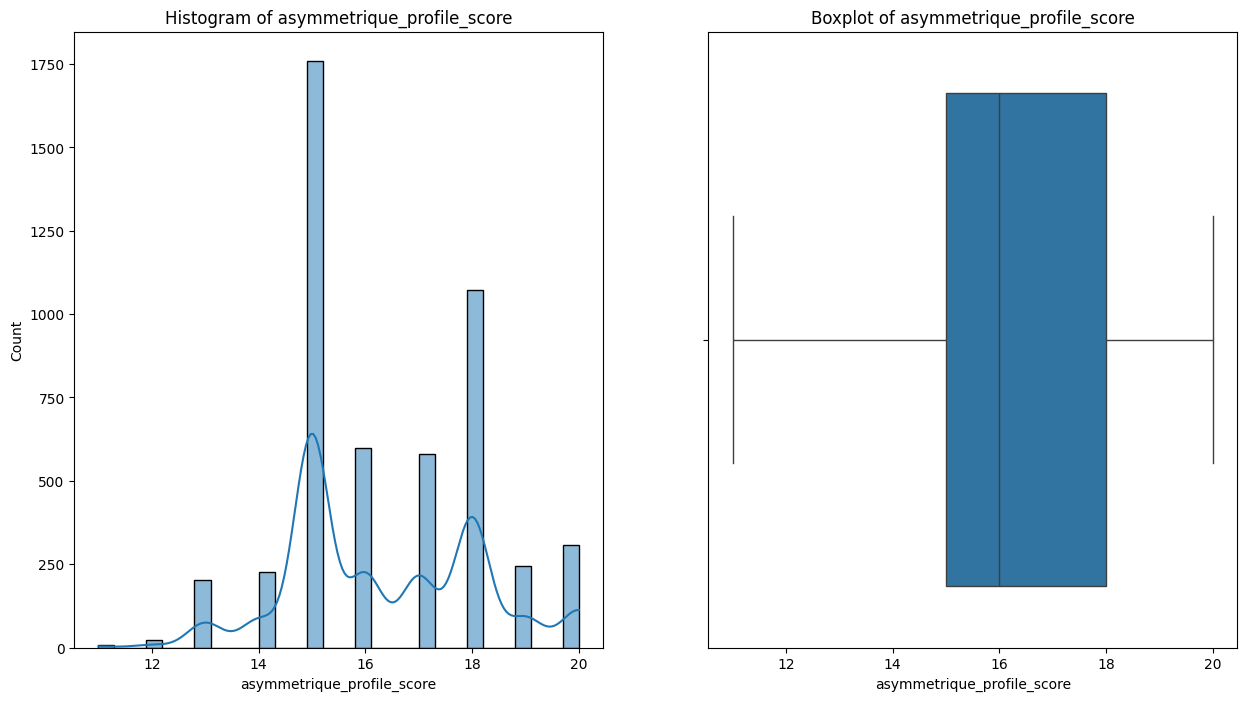

In [116]:
# creating boxplot and histogram for the numerical columns but using loop
for column in X.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.histplot(X[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X[column])
    plt.title(f"Boxplot of {column}")
    
    plt.show()


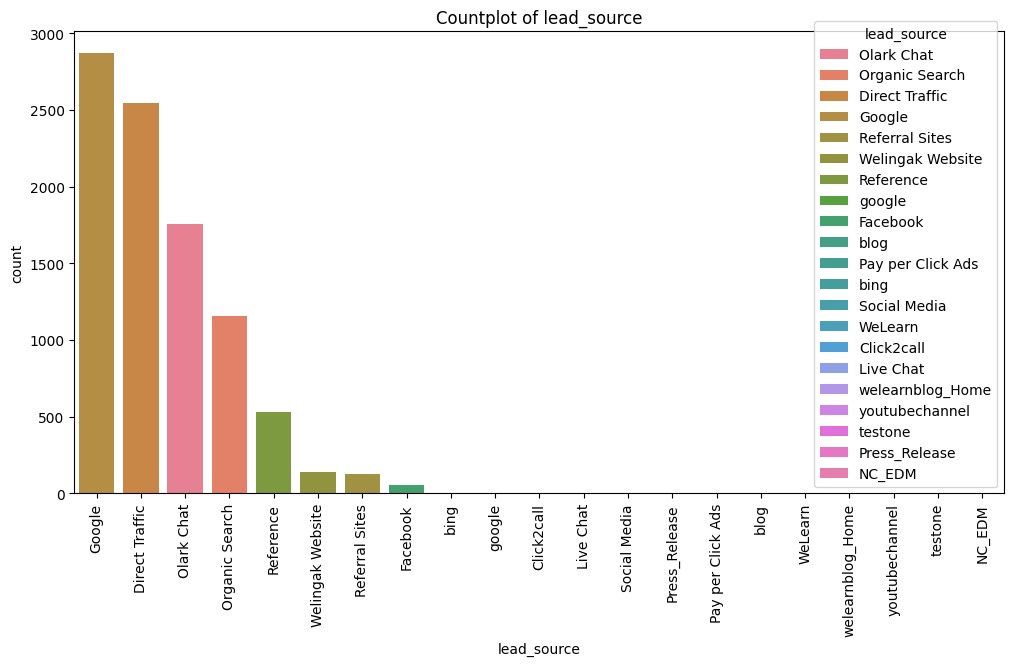

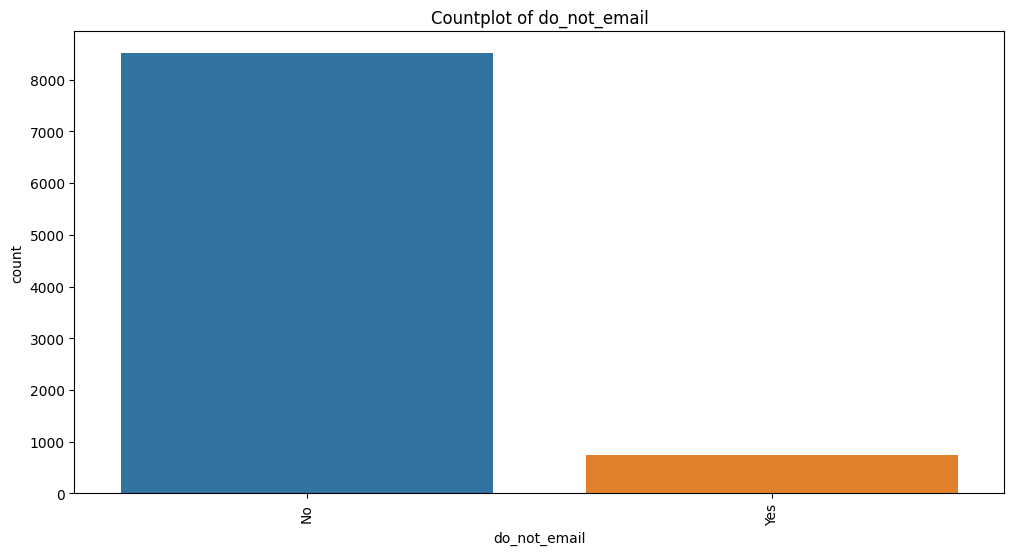

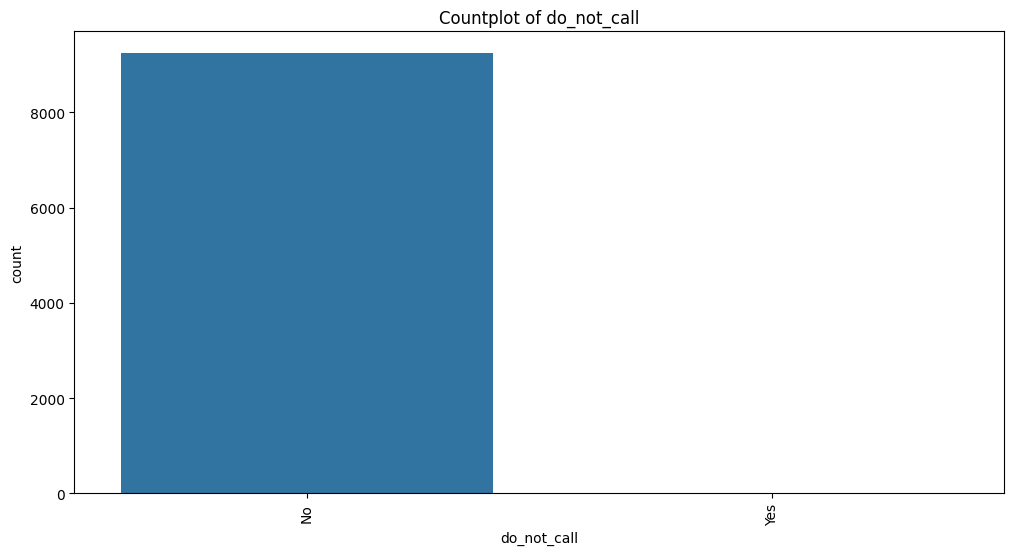

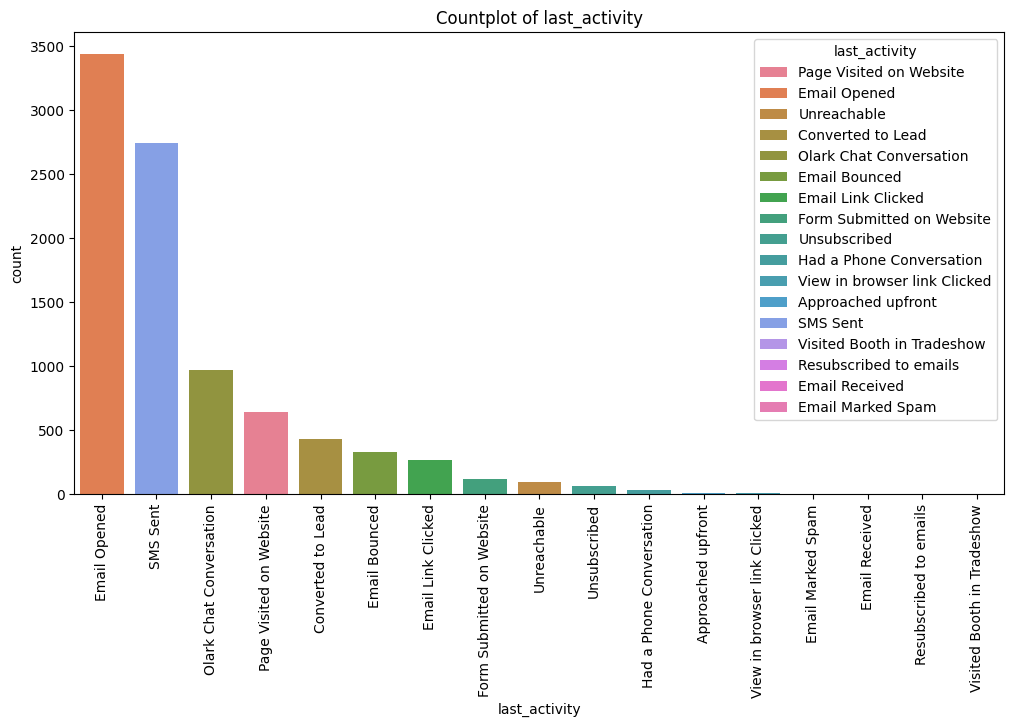

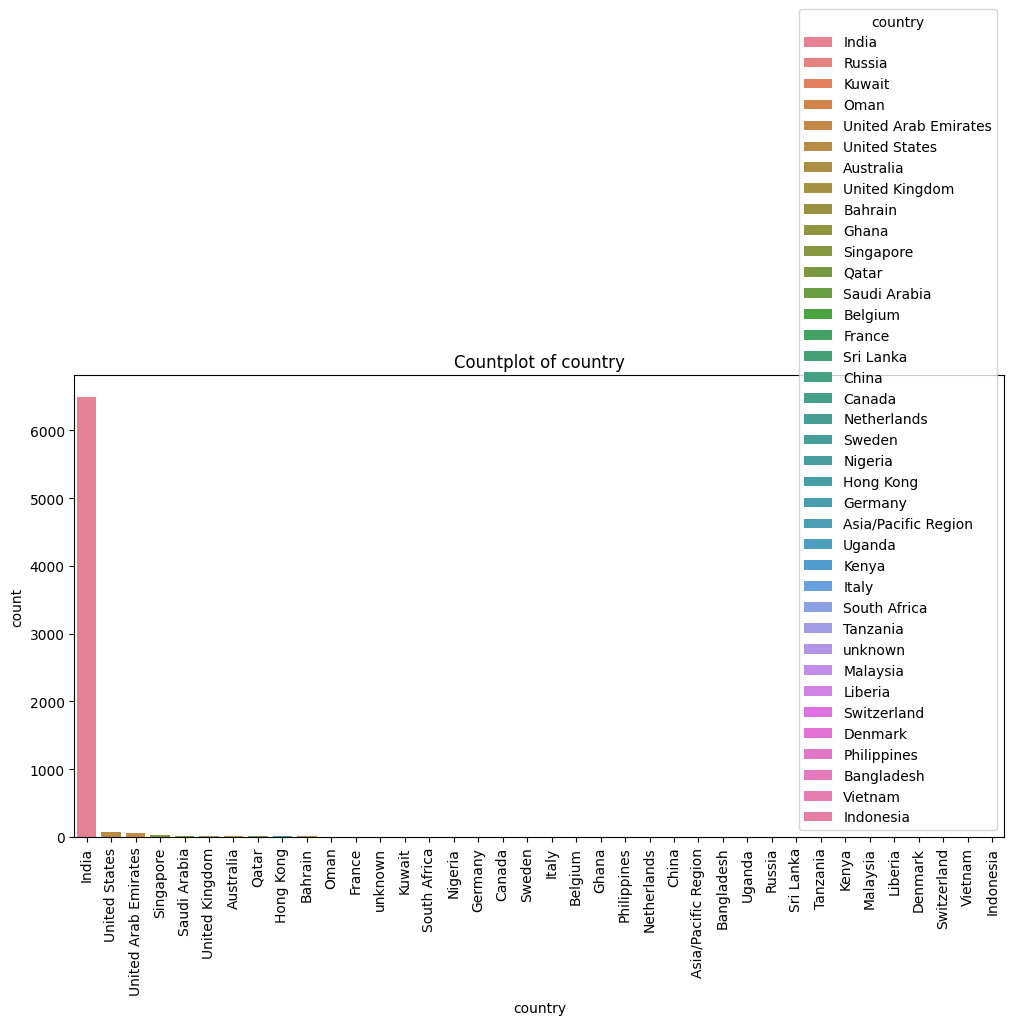

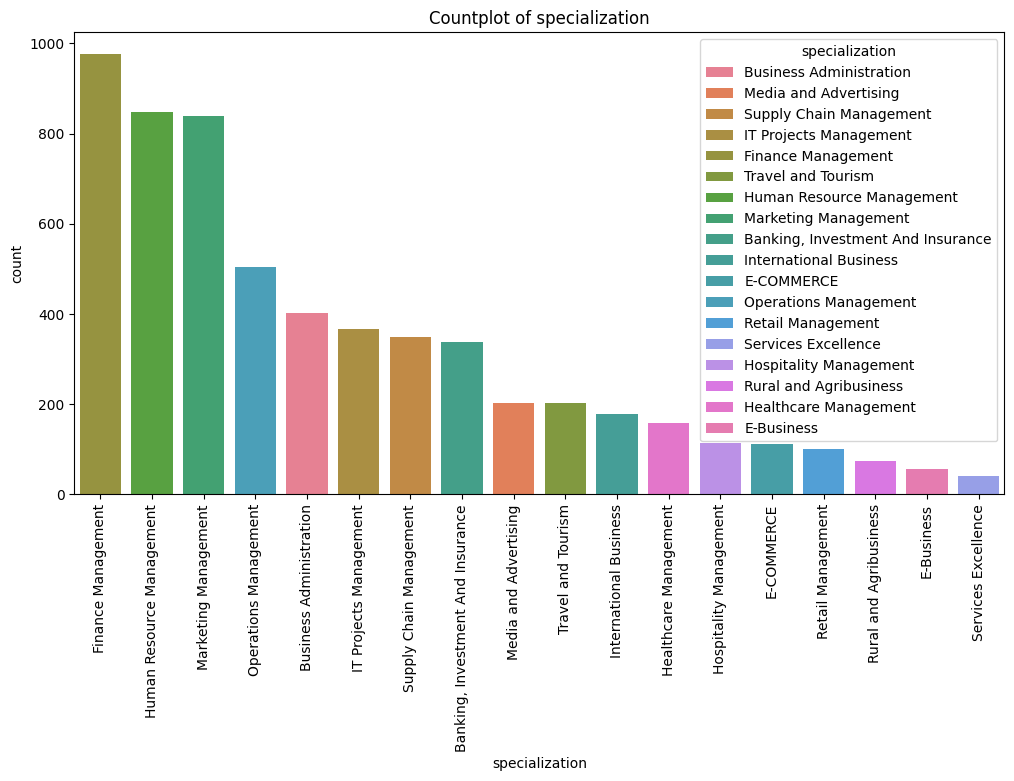

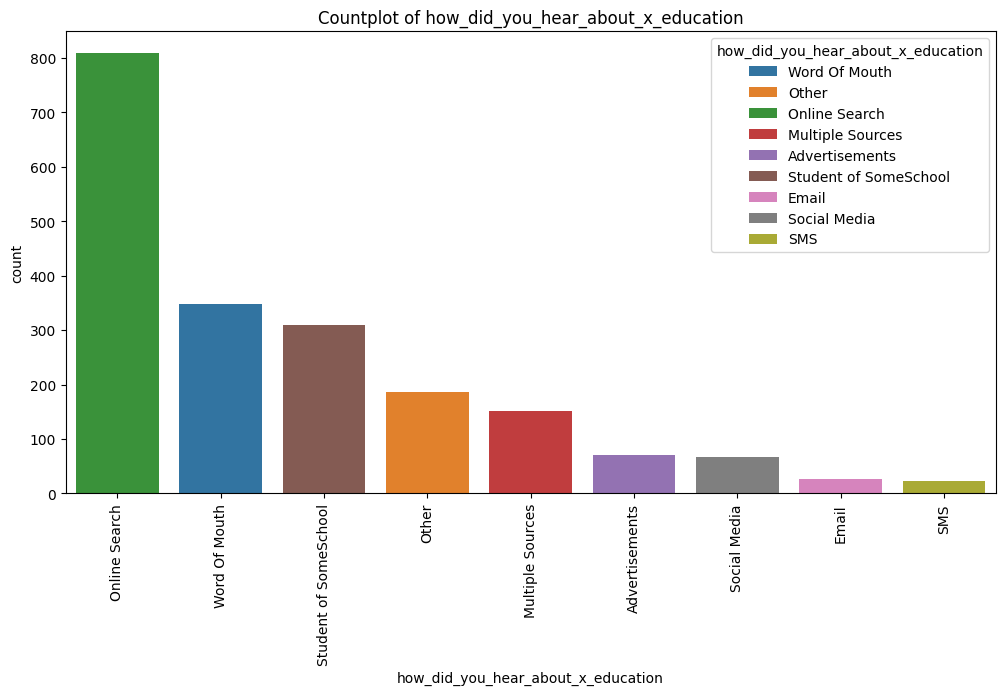

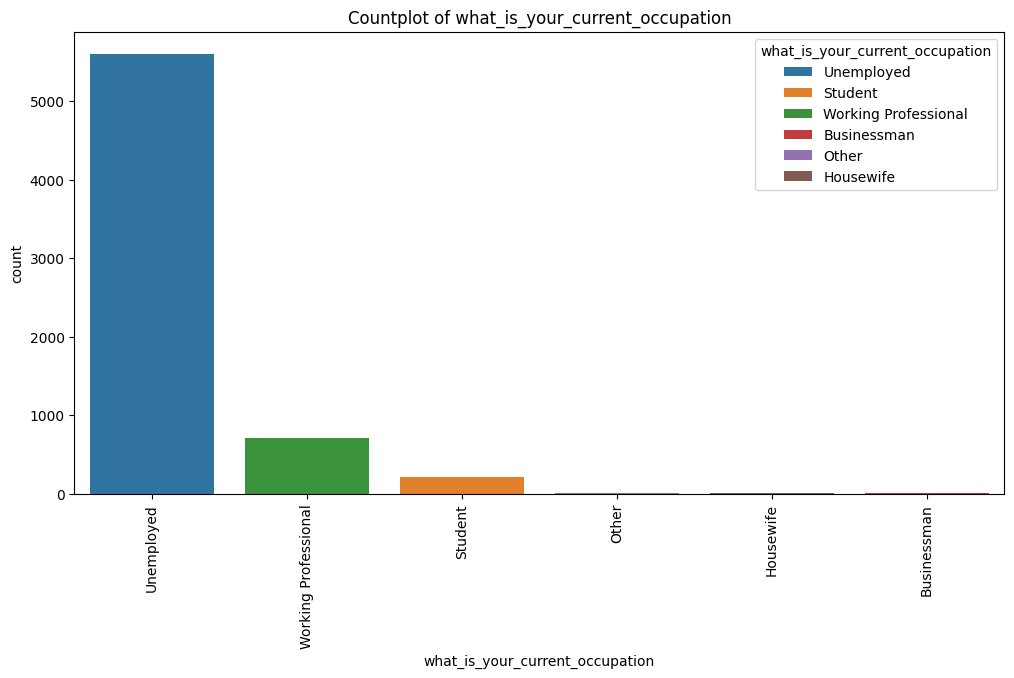

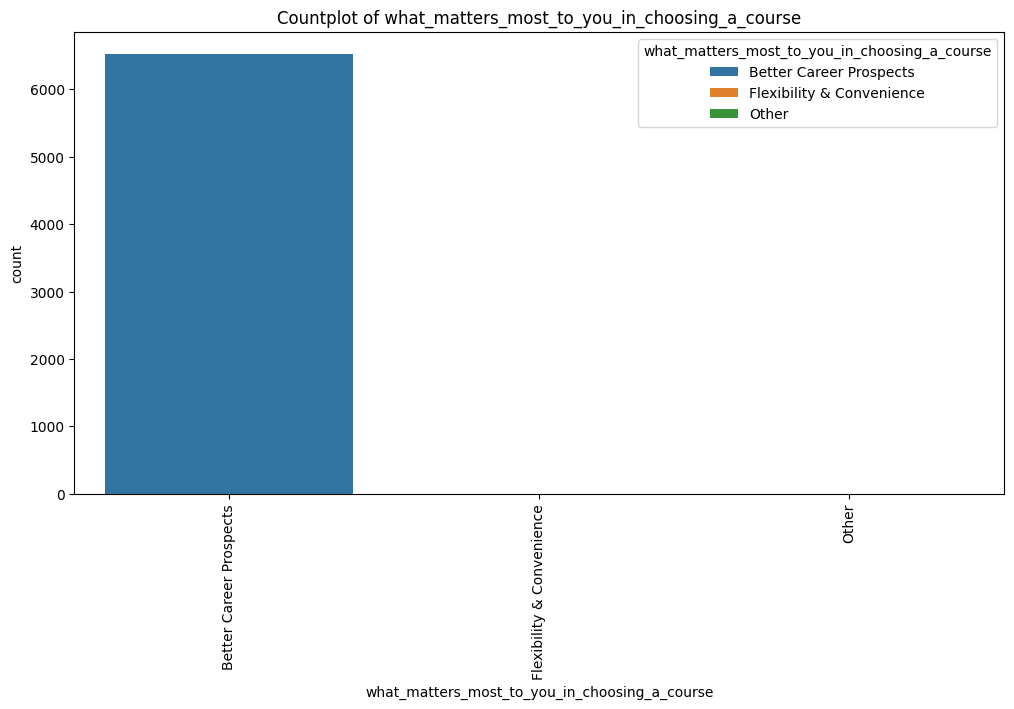

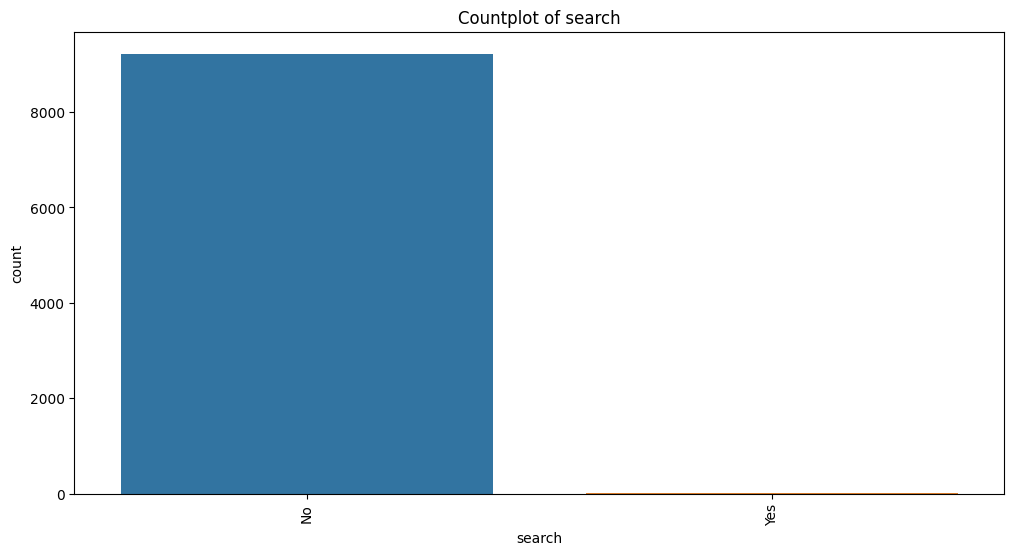

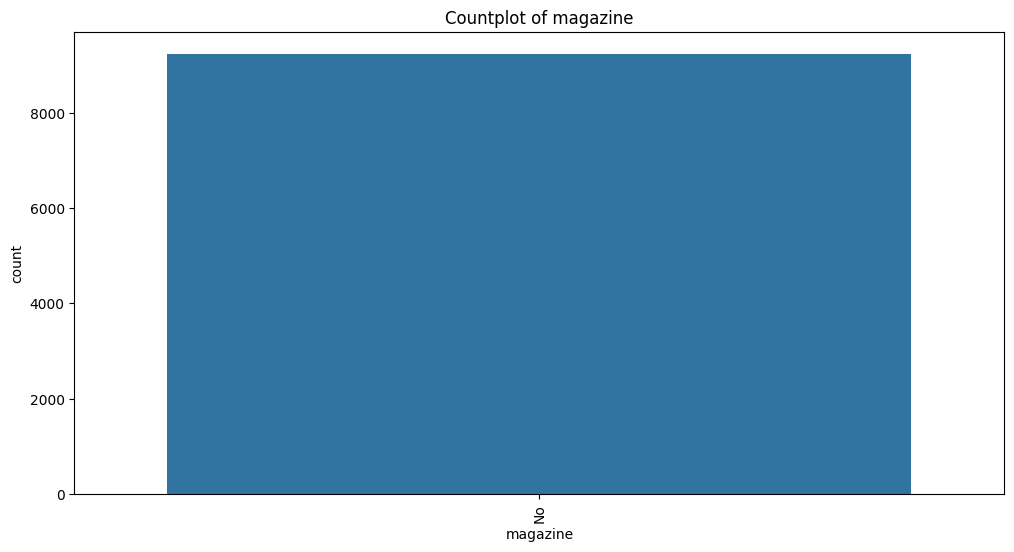

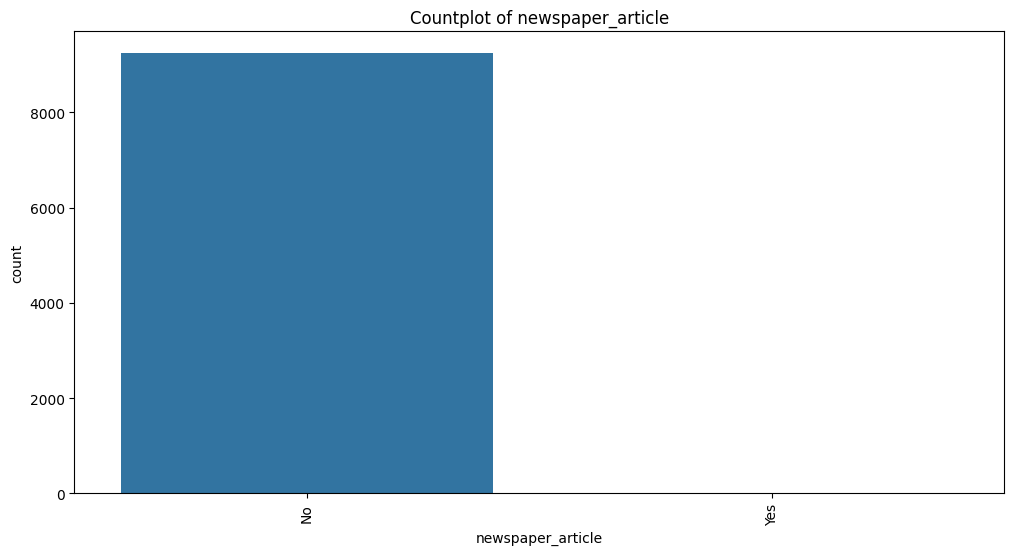

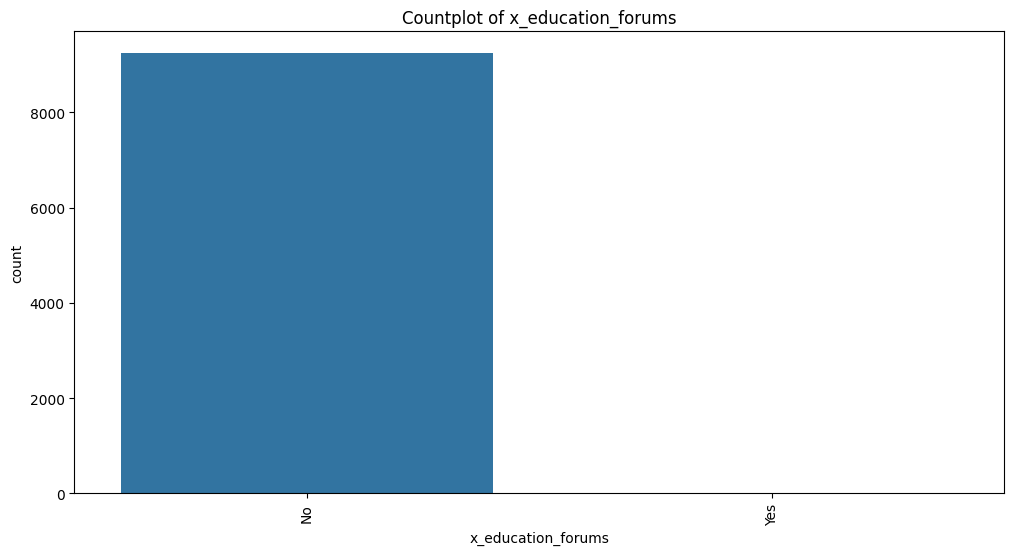

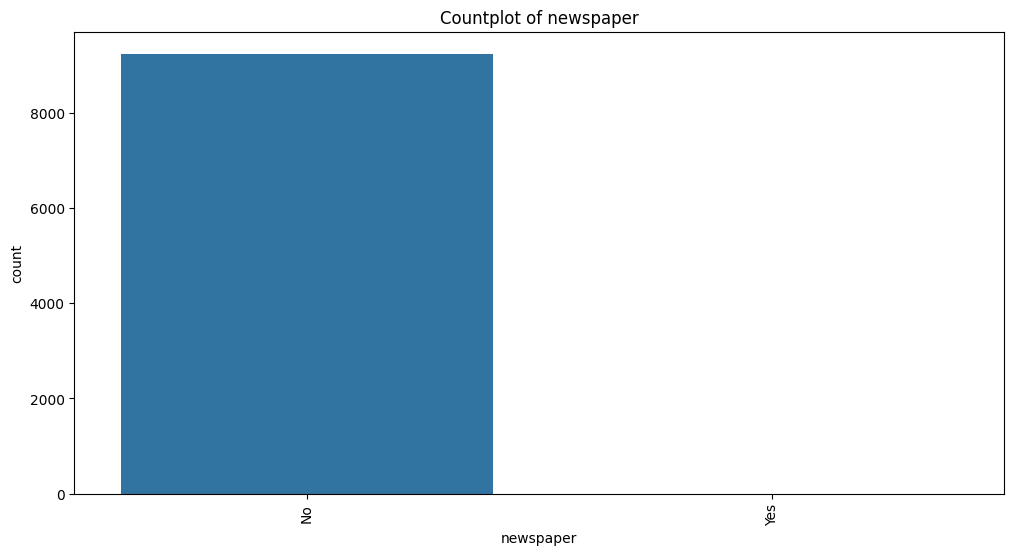

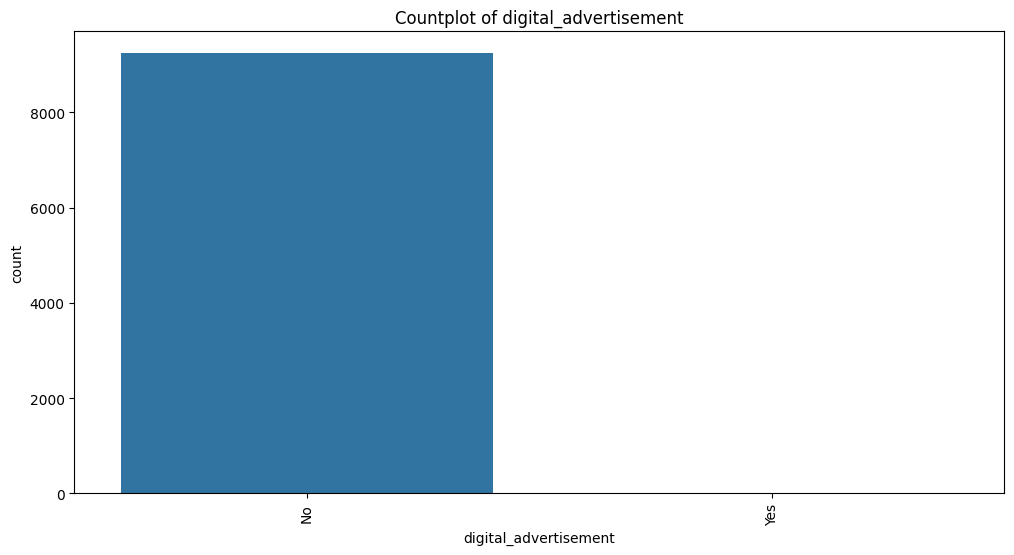

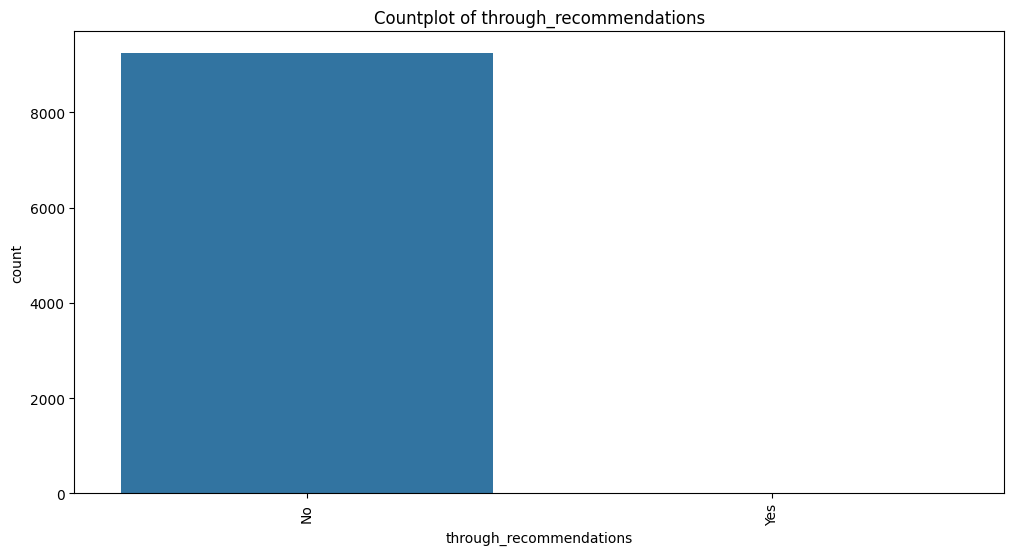

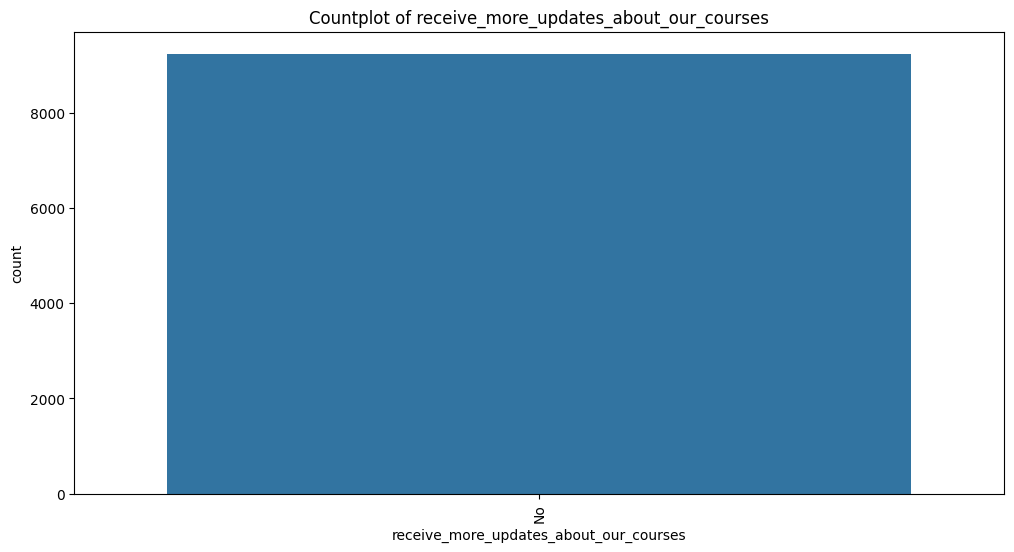

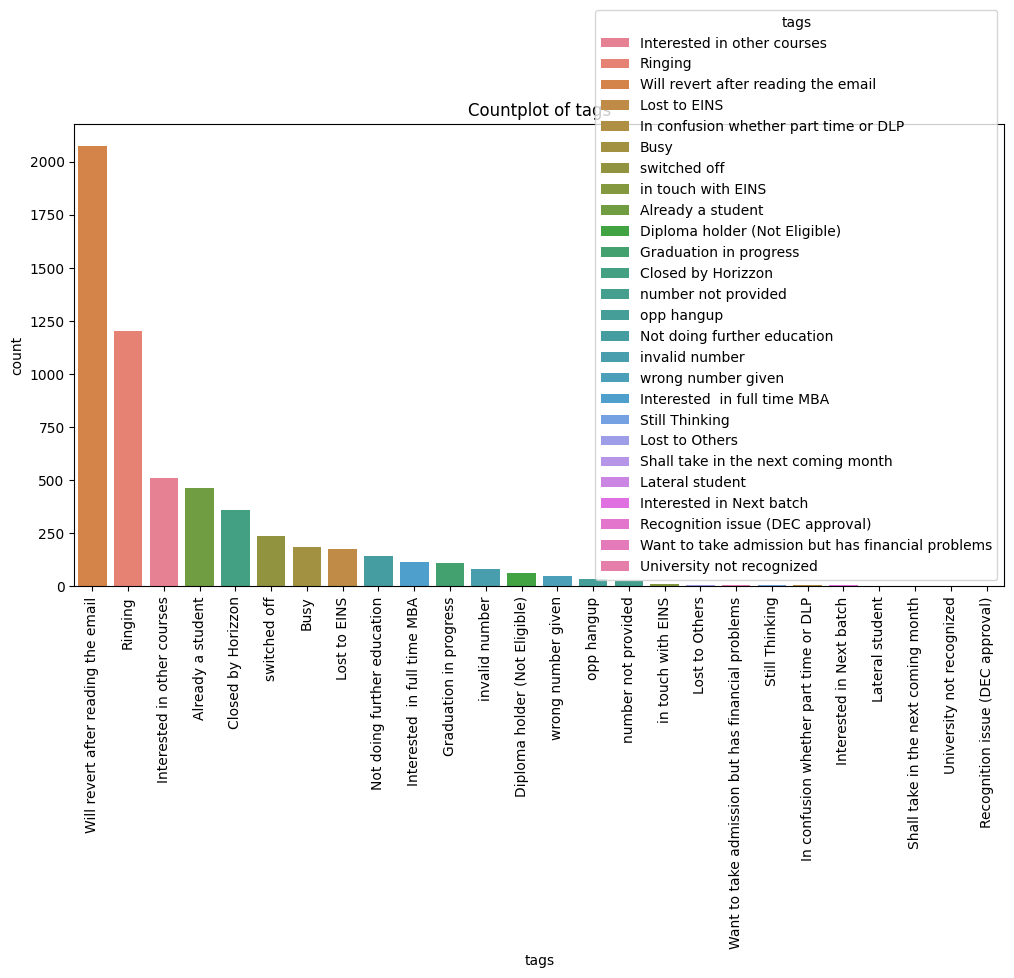

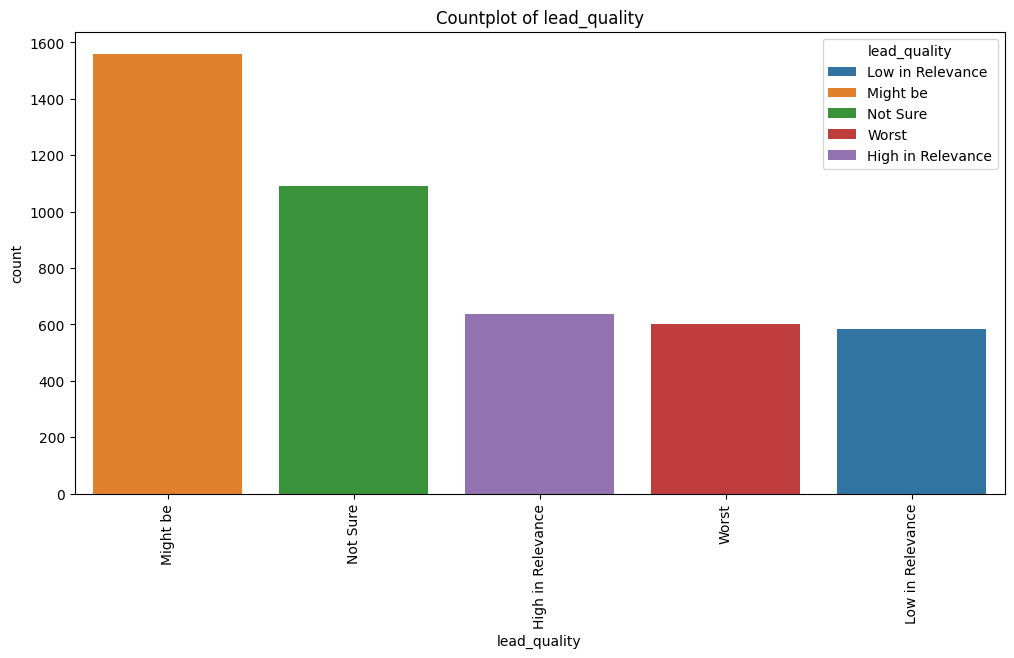

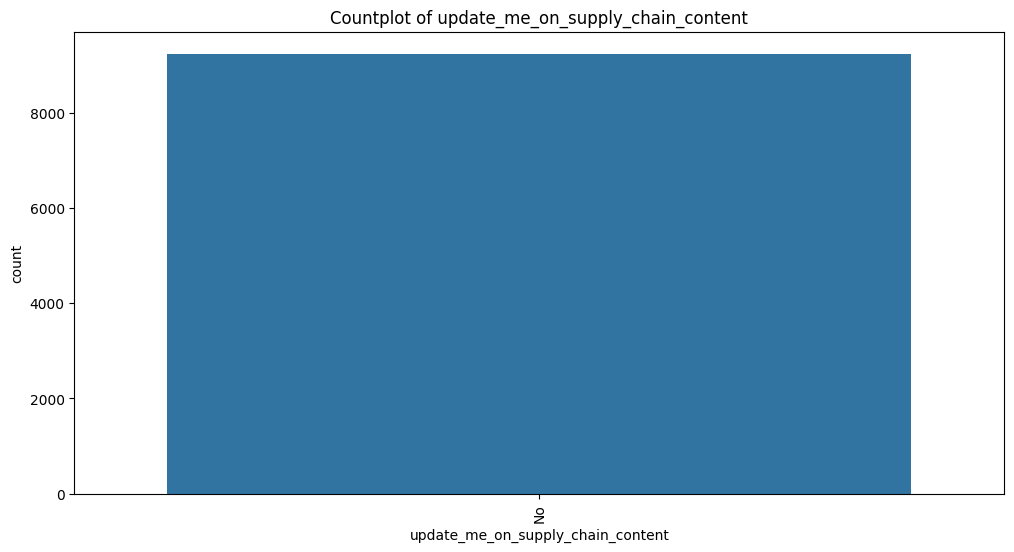

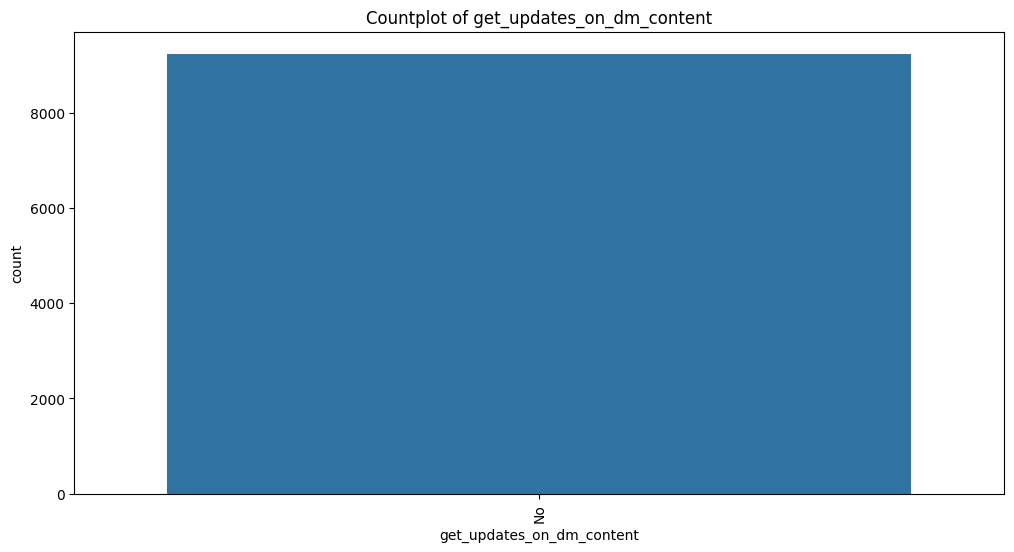

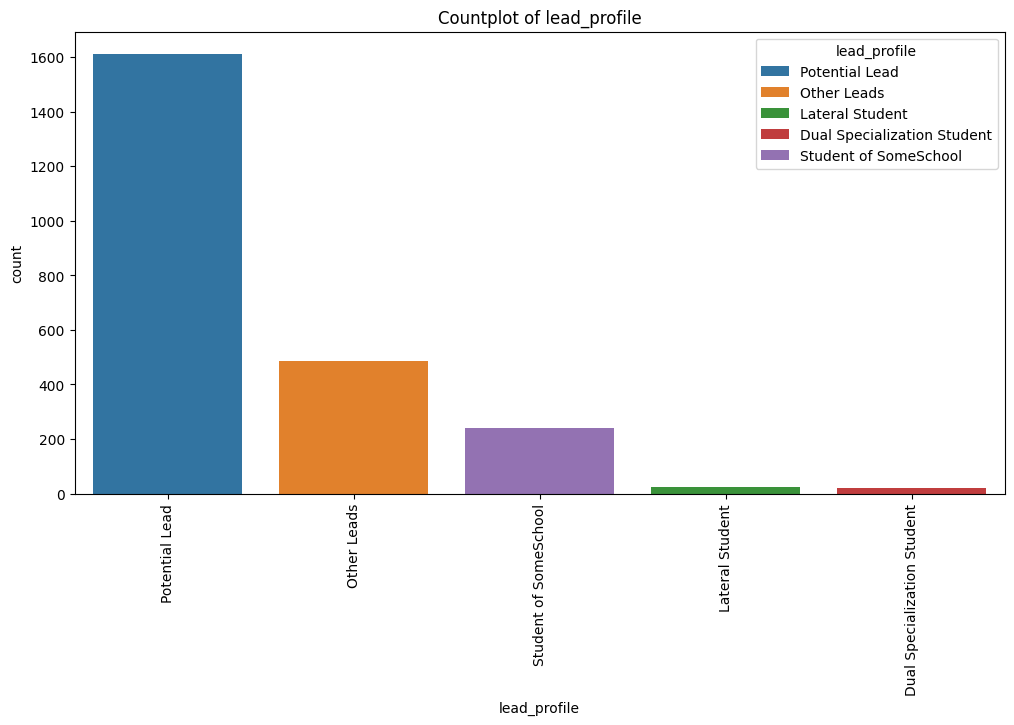

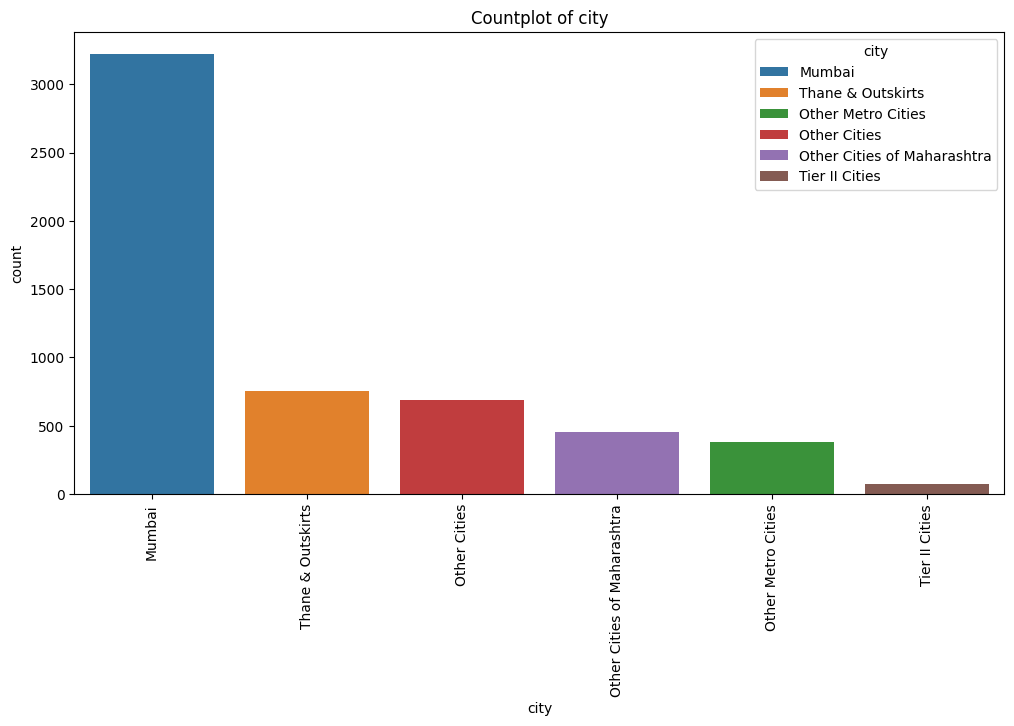

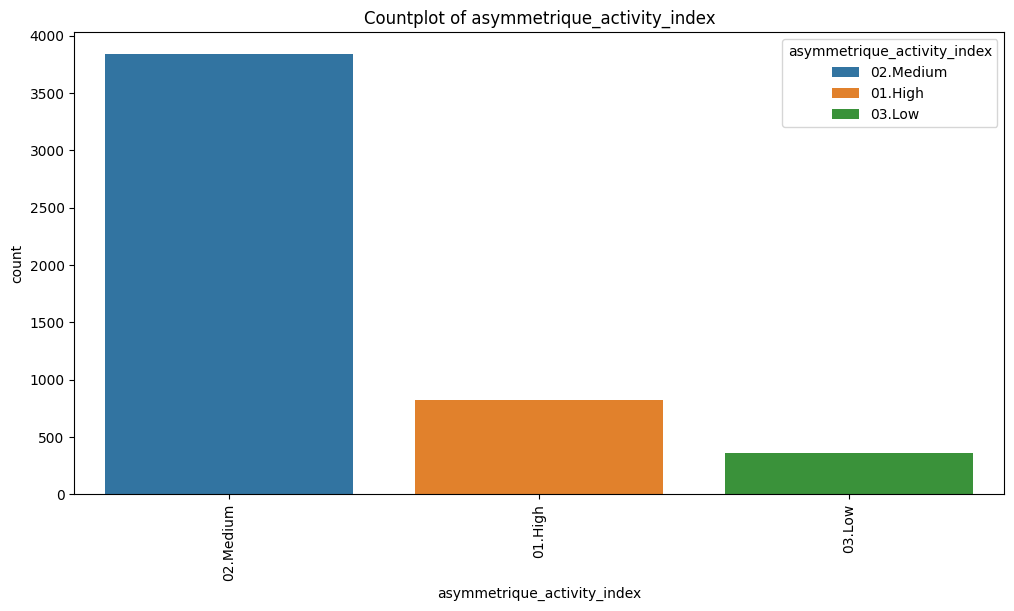

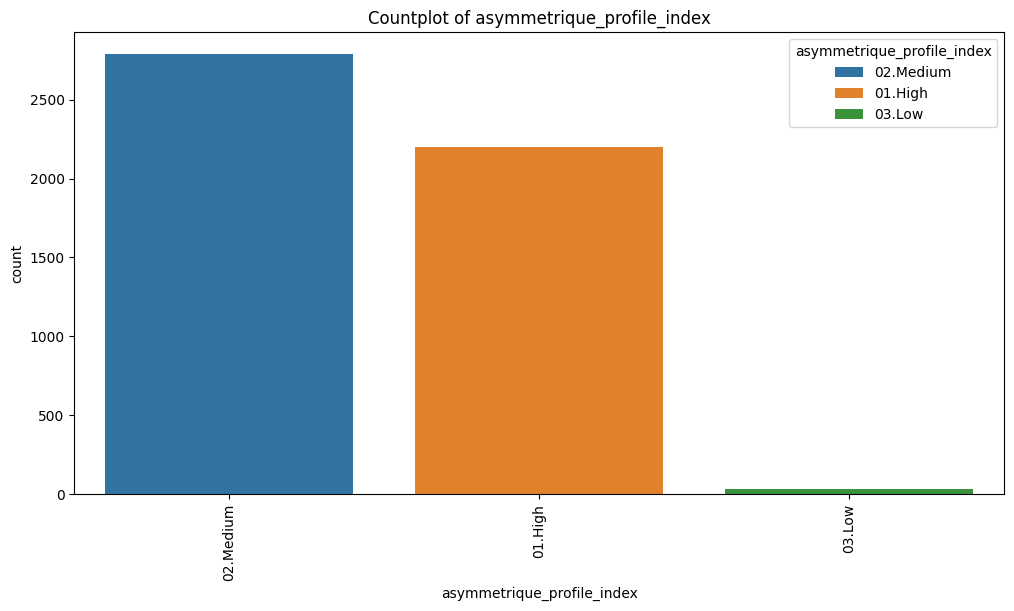

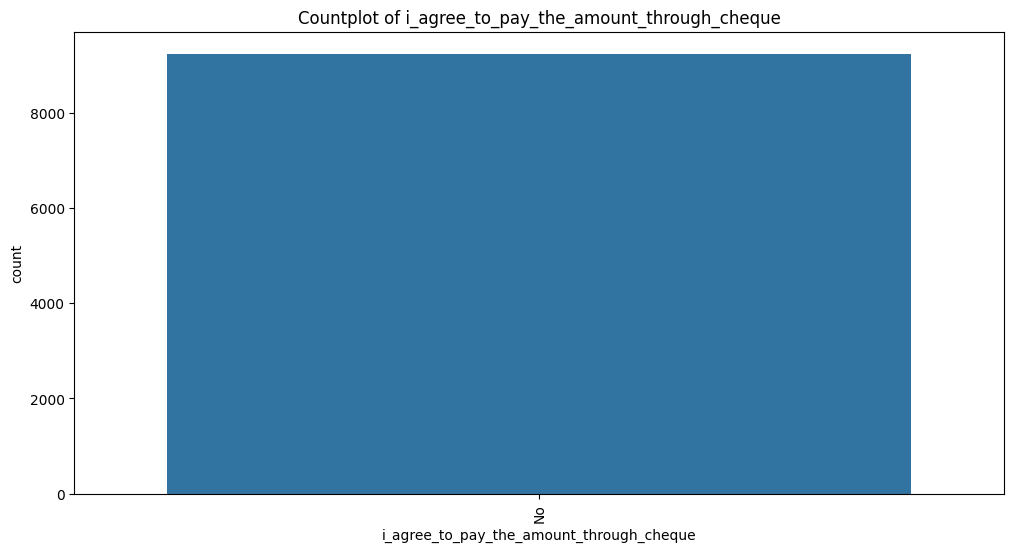

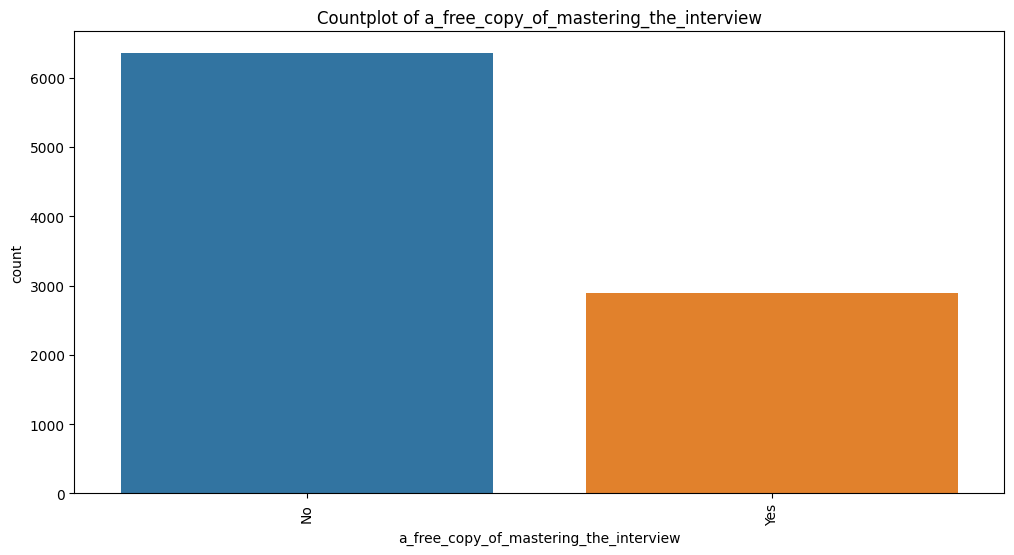

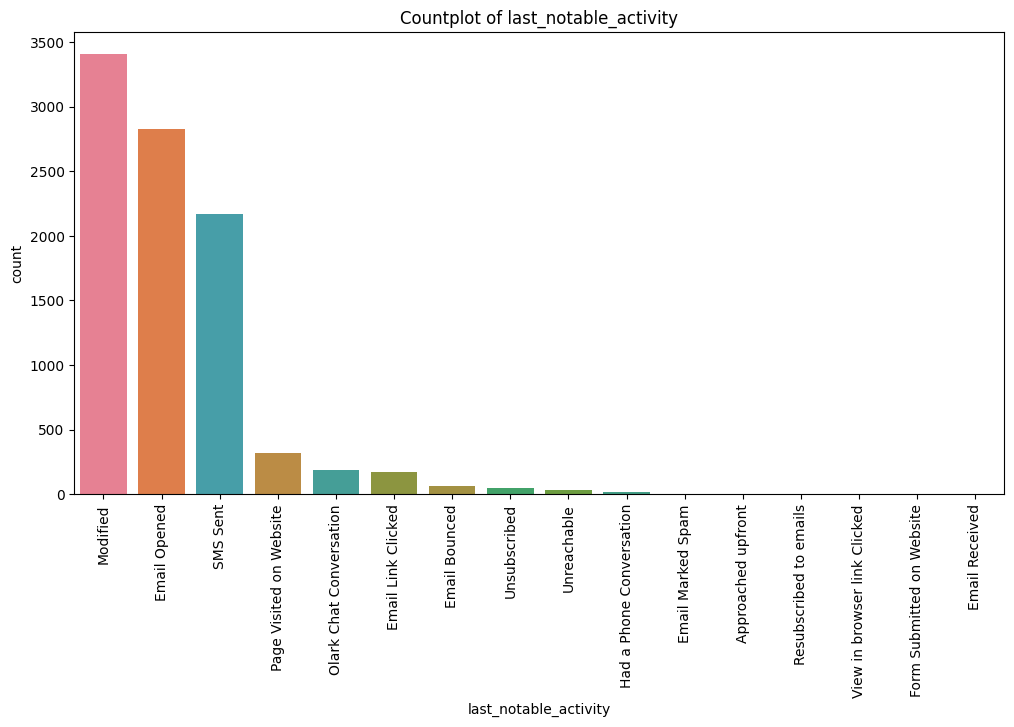

In [117]:
# look at the categorical columns using countplot excluding 'prospect_id' and 'lead_number' as they are irrelevant
for column in X.select_dtypes(include=["object"]).columns[2:]:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=X, x=column, order=X[column].value_counts().index, hue=column)
    plt.title(f"Countplot of {column}")
    plt.xticks(rotation=90)
    plt.show()

4.2 BIVARIATE AND MULTIVARIATE ANALYSIS

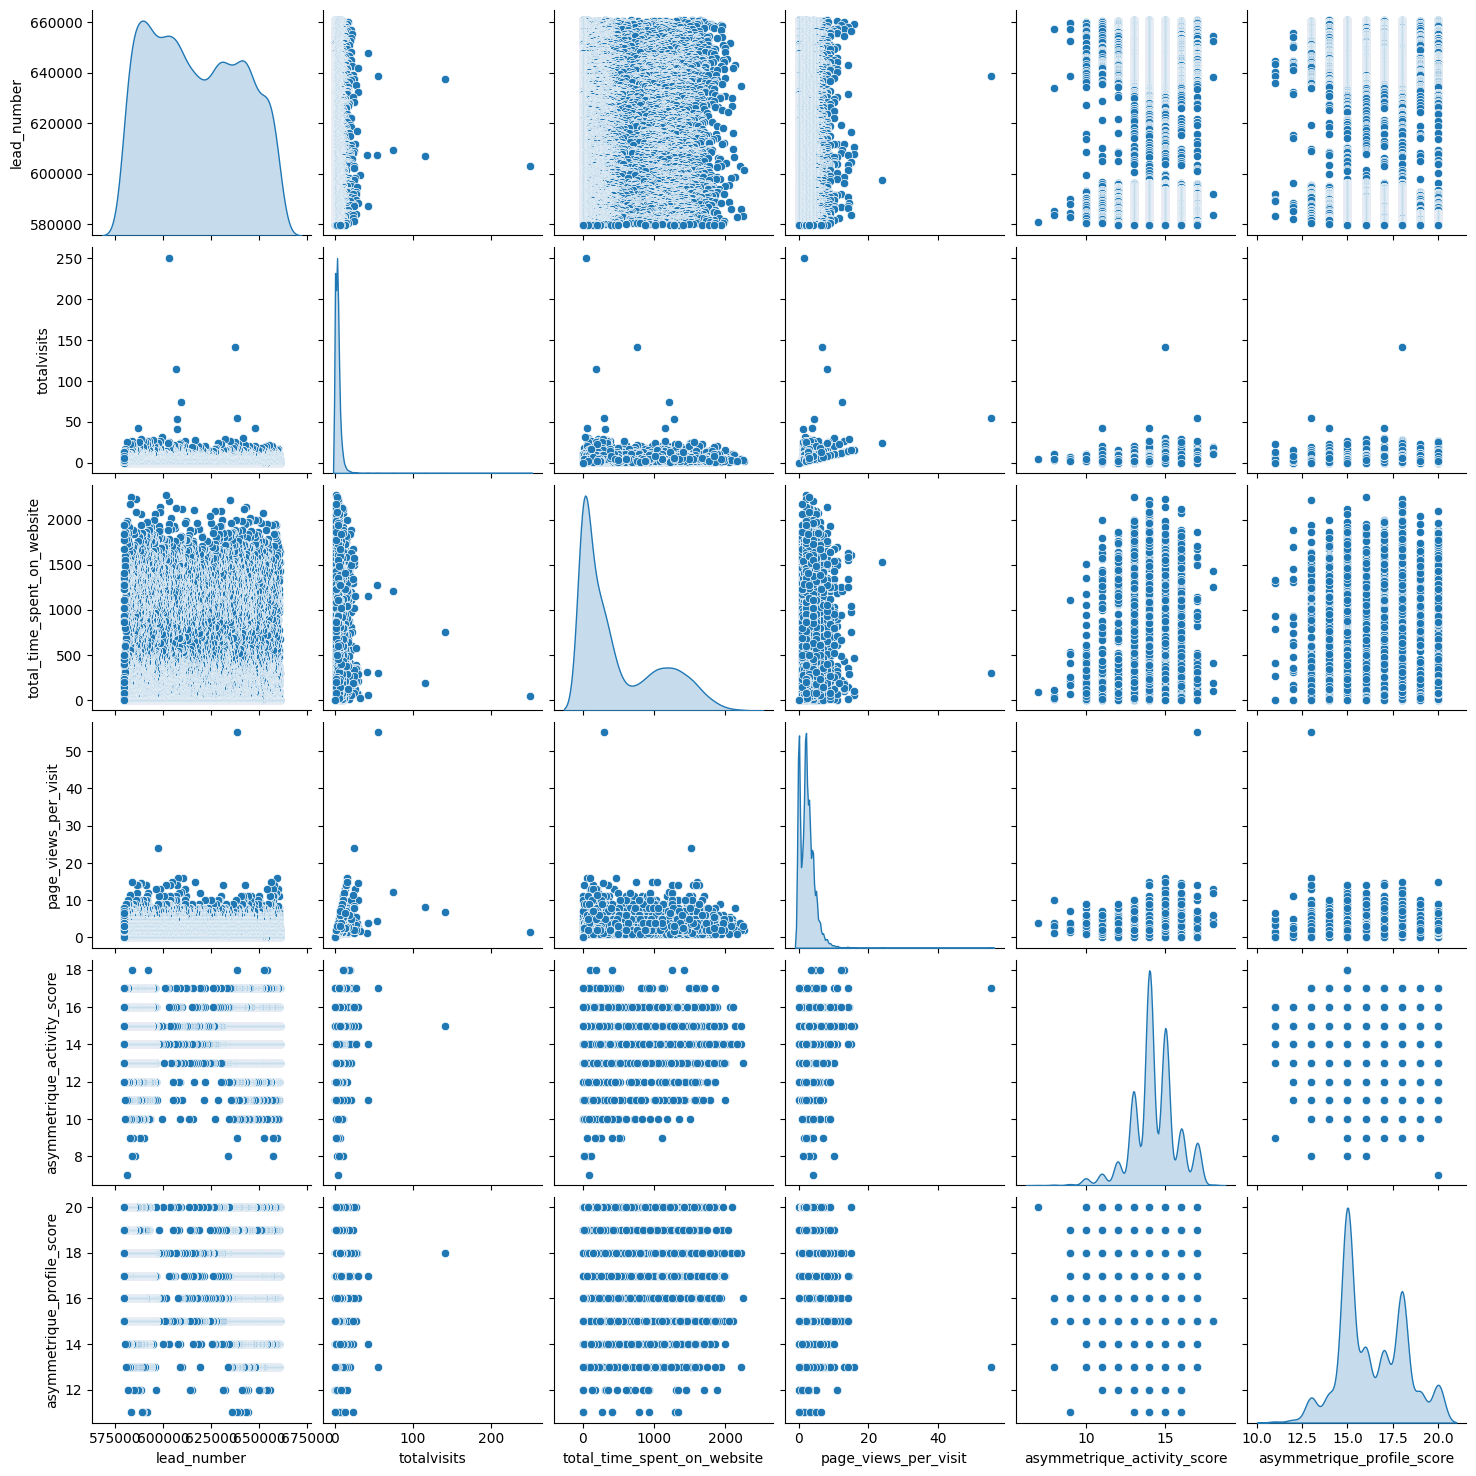

In [118]:
# creating pairplot for the numerical columns between each other
sns.pairplot(X.select_dtypes(include=["int64", "float64"]), diag_kind='kde')

# saving an image
#plt.savefig("pairplot.png")

plt.show()

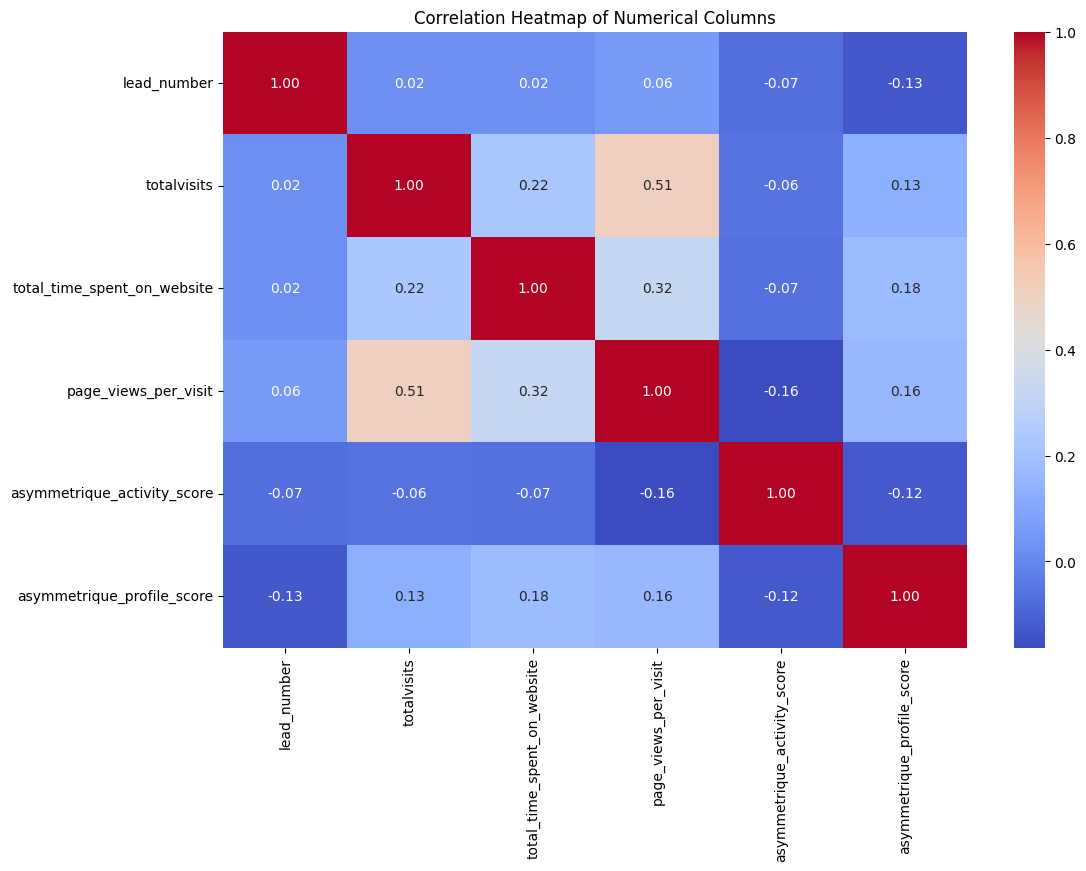

In [119]:
# creating heatmap for the correlation between the numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(X.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Columns")

# saving an image
#plt.savefig("correlation_heatmap.png")

plt.show()

---

#### **5. FEATURE SELECTION**

In [120]:
# dropping "prospect_id" and "lead_number" as they are not relevant to the machine learning model
X.drop(columns=["prospect_id", "lead_number"], inplace=True, axis=1)

---

#### **6. TRAIN-TEST SPLIT**

In [121]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=ran)

---

#### **7. PREPROCESSING PIPELINES**

In [122]:
# identify numerical and categorical columns. Note: X_train is used here to avoid data leakage.
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

>Now we will be using Scikit-Learn's SimpleImputer to swap the missing values with median based on numerical column and add additional missing-indicator columns, similarly for categorical column, we will use mode and add missing-indicator. 
**NOTE:** The reason behind using missing-indicator is that we can see there are heavy missing values(30-70%) so we are teaching the model to recognise the difference between the imputed values and the actual values of the dataset, but also ensuring that the null values are handled.

In [123]:
# numerical pipeline with missing indicator
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('scaler', StandardScaler())
])

**NOTE:** From EDA we saw that there were some outliers in the dataset, so we have used 'median' with the simple imputer instead of 'mean'.

In [124]:
# categorical pipeline with missing indicator
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

Now we will combine the numerical and categorical using Scikit-Learn into one complete dataset

In [125]:
# combine the pipelines into a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

---

#### **8. MODEL BUILDING**

In [126]:
# complete pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=ran))
])

In [127]:


# fit the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['totalvisits',
                                                   'total_time_spent_on_website',
                                                   'page_views_per_visit',
                                                   'asymmetrique_activity_score',
                                                   'asymmetrique_profile_score']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   Simple...
                                                   'receive_more_updates_about_our_courses',
                                                   'tags', 'lead_quality',
                                                   'update_me_on_supply_chain_content',
                                                   'get_updates_on_dm_content',
                                                   'lead_profile', 'city',
                                                   'asymmetrique_activity_index',
                                                   'asymmetrique_profile_index',
                                                   'i_agree_to_pay_the_amount_through_cheque',
                                                   'a_free_copy_of_mastering_the_interview',
                                                   'last_notable_activity'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=17))])

In [128]:
# predictions
y_prediction = model.predict(X_test)
y_probability = model.predict_proba(X_test)[:, 1]

---

#### **9. RESULTS**

In [129]:
# classification report
print("Classification Report:\n", classification_report(y_test, y_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1136
           1       0.94      0.91      0.92       712

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848



ROC-AUC Score: 0.984232819670834


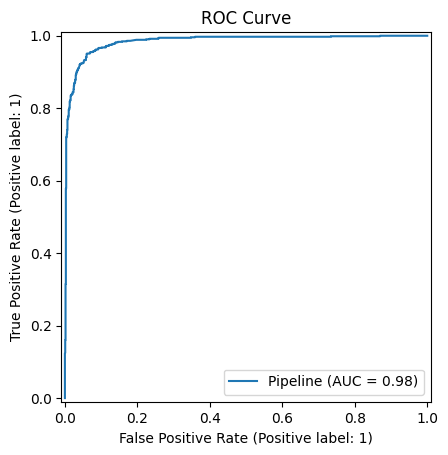

In [130]:
# roc-auc score
print("ROC-AUC Score:", roc_auc_score(y_test, y_probability))

# roc auc graph
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)

plt.title("ROC Curve")

# saving the image
#plt.savefig("roc_curve.png")

plt.show()

In [131]:
# accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_prediction))

Accuracy Score: 0.9420995670995671


In [132]:
# confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_prediction))

Confusion Matrix:
 [[1092   44]
 [  63  649]]



##### **LEAD SCORING FROM 0-100**

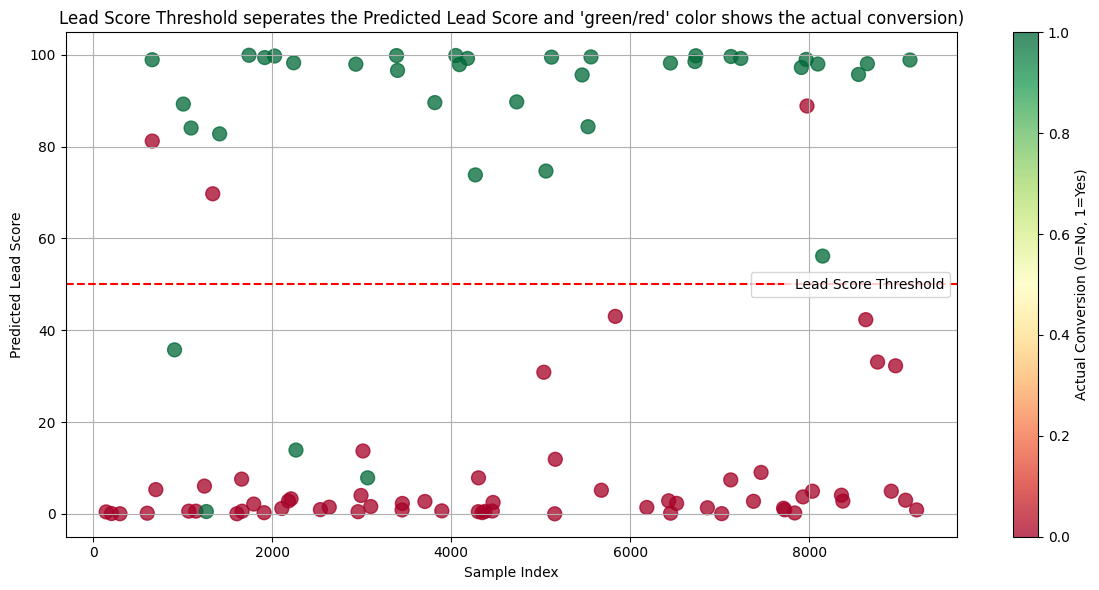

Some 10 random samples are as follows:


,Actual_conversion,Predicted Lead_score
7022,0,0.06
602,0,0.16
1145,0,0.60
143,0,0.44
2933,1,97.95
8360,0,4.08
657,1,98.93
297,0,0.04
5034,0,30.86
1792,0,2.15


In [133]:
# convert probability to score from 0 to 100
lead_scores = (y_probability * 100).round(2)

# create a DataFrame with the lead scores
lead_score_df = pd.DataFrame({
    "Actual_conversion": y_test,
    "Predicted Lead_score": lead_scores
})

# show 100 random rows of the lead score DataFrame
sample = lead_score_df.sample(100)

# showing the sample in the form of scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(sample.index, sample["Predicted Lead_score"], c=sample["Actual_conversion"], cmap='RdYlGn', s=100, alpha=0.75)
plt.colorbar(label='Actual Conversion (0=No, 1=Yes)')
plt.title("Lead Score Threshold seperates the Predicted Lead Score and 'green/red' color shows the actual conversion)")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Lead Score")
plt.axhline(y=50, color='r', linestyle='--', label='Lead Score Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# looking at the sample
print("Some 10 random samples are as follows:")
sample.head(10)

---

Brier Score

In [134]:
from sklearn.metrics import brier_score_loss
print("Brier Score Loss:", brier_score_loss(y_test, y_probability))

Brier Score Loss: 0.043274725746226685


#### **10. RECOMMENDATIONS**
>Using the above results we can conclude that:
>1. Focus marketing and sales efforts on leads with scores above about 80 and they can be considered Hot Leads.

>2. Regularly monitor lead conversion patterns to ensure continued model relevance.

>3. Consider collecting or engineering additional features (like response time or interaction history) that could further improve accuracy.

>4. Keep track of score thresholds over time — what “high-converting” means might shift as the business evolves.

---
---

#### **11. SOLUTIONS TO ADDITIONAL QUESTIONS AS ASKED IN THE PDF.** 

**Q1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?**

In [135]:
# feature names
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# get coefficients from the logistic regression model
coefficients = model.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coef': np.abs(coefficients)
})

solution_1 = coef_df.sort_values(by='abs_coef', ascending=False)

# showing result of top 15 variables which contribute most towards the probability of a lead getting converted
solution_1.head(15)

,feature,coefficient,abs_coef
152,cat__tags_Lost to EINS,6.272827,6.272827
144,cat__tags_Closed by Horizzon,4.866212,4.866212
160,cat__tags_Will revert after reading the email,4.350574,4.350574
155,cat__tags_Ringing,-2.833866,2.833866
165,cat__tags_switched off,-2.605183,2.605183
166,cat__tags_wrong number given,-2.060334,2.060334
142,cat__tags_Already a student,-1.913883,1.913883
27,cat__lead_source_Welingak Website,1.825463,1.825463
162,cat__tags_invalid number,-1.807996,1.807996
154,cat__tags_Not doing further education,-1.468579,1.468579


>The top 3 variables that contribute most towards the probability of a lead getting converted are:
>1. 'tags', 2. 'lead_source', 3. 'asymmetrique_activity_index'

>**NOTE:** the encoding was created as above which can be read as 'column type' (i.e. cat/num) then underscore and 'original feature name' again underscore and 'value'.

**Q2. What are the top 3 categorical/dummy variables in the model which should be focused the most on to increase the probability of lead conversion?**

In [136]:
# filtering from above only the categorical features
cat_coef_df = coef_df[coef_df['feature'].str.startswith('cat_')]

# now looking at top 3 of those
solution_2 = cat_coef_df.sort_values(by='abs_coef', ascending=False)
solution_2.head(3)

,feature,coefficient,abs_coef
152,cat__tags_Lost to EINS,6.272827,6.272827
144,cat__tags_Closed by Horizzon,4.866212,4.866212
160,cat__tags_Will revert after reading the email,4.350574,4.350574


> The top 3 categorical/dummy variables in the model which should be focused the most on to increase the probability of lead conversion are:
>1. 'cat__tags_Lost to EINS', 2. 'cat__tags_Closed by Horizzon', 3. 'cat__tags_Will revert after reading the email'

**Q3. X Education has a period of 2 months every year during which they hire some interns. The sales team has around 10 interns allotted to them. So, during this phase, they wish to make the lead conversion more aggressive. So, they want almost all the potential leads (i.e., the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.**

> Instead of using the default threshold of 0.5 for seperating the potentials, we can decrease the threshold to, say, 0.3 to include more potential leads.
> They can also segment the leads into high, medium and low priority category based on the predicted probability so that they can maximize the calling of hot leads. 

**Q4. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So, during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e., they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.**

>Here, the strategy shifts from maximizing recall(catching all potential converters) to maximizing precision(calling only those who are likely to convert). This can be done by increasing the lead score threshold to, say, 0.75 depending on how conservative the company wants to be. Other manual steps that can be followed is to set a daily cap of calls.

---
---
---